<a href="https://colab.research.google.com/github/gabrielluizone/FirstCode/blob/main/M%C3%A9todo_dos_M%C3%ADnimos_Quadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">

<h1><b>Minimização do Erro</b></h1>

> Cálculo | Faculdade de Tecnologia da Baixada Santista
- **Ciência de Dados**
</div>

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<div class="markdown-google-sans">

### Equação Geral de uma Parábola
</div>

## $$ \hat{y} = w_1x^2 + w_2x + b $$

In [112]:
# dados de treinamento
X = np.array([1, -1, 2, -2, 3, -3, 4, -4])
Y = np.array([4, 5, 7, 8, 12, 13, 19, 20])
df = pd.DataFrame({'X': X, 'Y': Y})
df

,X,Y
0,1,4
1,-1,5
2,2,7
3,-2,8
4,3,12
5,-3,13
6,4,19
7,-4,20


<div class="markdown-google-sans">

### Método de Mínimos Quadrados

> Essa é uma equação matricial usada para encontrar a melhor reta de ajuste para um conjunto de treinamento
1. A matriz do lado esquerdo da equação é conhecida como matriz de covariância e contém as somas de produtos e quadrados dos valores de x
2. A matriz do lado direito é conhecida como matriz de resposta e contém as somas de produtos dos valores de x e y
</div>

## $$
\begin{bmatrix}
n & \sum_{i=1}^{n} x_i & \sum_{i=1}^{n} x_i^2 \\
\sum_{i=1}^{n} x_i & \sum_{i=1}^{n} x_i^2 & \sum_{i=1}^{n} x_i^3 \\
\sum_{i=1}^{n} x_i^2 & \sum_{i=1}^{n} x_i^3 & \sum_{i=1}^{n} x_i^4 \\
\end{bmatrix}
\cdot
\begin{bmatrix}
w_1 \\
w_2 \\
b \\
\end{bmatrix}
=
\begin{bmatrix}
\sum_{i=1}^{n} y_i \\
\sum_{i=1}^{n} x_iy_i \\
\sum_{i=1}^{n} x_i^2y_i \\
\end{bmatrix}
$$


In [113]:
# número de amostras
n = len(X)

# matriz de coeficientes
A = np.array([[        n      ,    X.sum()    , (X**2).sum()],
              [     X.sum()   , (X**2).sum()  , (X**3).sum()],
              [  (X**2).sum() , (X**3).sum()  , (X**4).sum()]])

# matriz do lado direito
b = np.array([Y.sum(), (X*Y).sum(), (X**2*Y).sum()])

print(f'Matriz de Coeficientes:')
display(pd.DataFrame(A))

print('\n\nMatriz Resposta:')
display(pd.DataFrame(b))

Matriz de Coeficientes:


,0,1,2
0,8,0,60
1,0,60,0
2,60,0,708




Matriz Resposta:


,0
0,88
1,-10
2,918


In [114]:
def parabolic_regression(X, Y):

  # Somas e Processos com X e Y
  n = len(X)
  X_sum = sum(X)
  X2_sum = sum([x**2 for x in X])
  X3_sum = sum([x**3 for x in X])
  X4_sum = sum([x**4 for x in X])
  
  Y_sum = sum(Y)
  XY_sum = sum([x*y for x, y in zip(X,Y)])
  X2Y_sum = sum([x**2*y for x, y in zip(X,Y)])

  # Matriz de coeficientes
  cov_matrix = pd.DataFrame(np.array([[n, X_sum, X2_sum],
                                      [X_sum, X2_sum, X3_sum],
                                      [X2_sum, X3_sum, X4_sum]]))
  print('Matriz de Coeficientes:')
  display(cov_matrix)

  # Matriz de resposta
  res_matrix = pd.DataFrame(np.array([Y_sum, XY_sum, X2Y_sum]))
  print('Matriz de Resposta:')
  display(res_matrix)

  # Coeficientes da parábola
  coef = np.flip(np.linalg.solve(cov_matrix, res_matrix))
  return coef
  
parabolic_regression(X, Y)

Matriz de Coeficientes:


,0,1,2
0,8,0,60
1,0,60,0
2,60,0,708


Matriz de Resposta:


,0
0,88
1,-10
2,918


array([[ 1.        ],
       [-0.16666667],
       [ 3.5       ]])

### Modificação da Função
> Excluido a vizualização da Matriz

In [115]:
def parabolic_regression(X, Y):

  # Somas e Processos com X e Y
  n = len(X)
  X_sum = sum(X)
  X2_sum = sum([x**2 for x in X])
  X3_sum = sum([x**3 for x in X])
  X4_sum = sum([x**4 for x in X])
  
  Y_sum = sum(Y)
  XY_sum = sum([x*y for x, y in zip(X,Y)])
  X2Y_sum = sum([x**2*y for x, y in zip(X,Y)])

  # Matriz de covariância
  cov_matrix = np.array([[n, X_sum, X2_sum], [X_sum, X2_sum, X3_sum], [X2_sum, X3_sum, X4_sum]])

  # Matriz de resposta
  res_matrix = np.array([Y_sum, XY_sum, X2Y_sum])

  # Coeficientes da parábola
  coef = np.flip(np.linalg.solve(cov_matrix, res_matrix))
  return coef
  
parabolic_regression(X, Y)

array([ 1.        , -0.16666667,  3.5       ])

In [116]:
# Resolver o sistema de equações
w1, w2, b = parabolic_regression(X, Y)
print(f'Valores após o Escalonamento:\n\
w1 = {w1:.1f} | w2 = {w2:.2f} | b = {b:.1f}')

Valores após o Escalonamento:
w1 = 1.0 | w2 = -0.17 | b = 3.5


In [117]:
# escrever a equação da parábola
print(f"A parábola que melhor se ajusta aos dados é\n>> y = {w1:.2f}x^2 + {w2:.2f}x + {b:.2f}")

A parábola que melhor se ajusta aos dados é
>> y = 1.00x^2 + -0.17x + 3.50


# $$\hat{y} = x^2 + -0.17x + 3.5$$

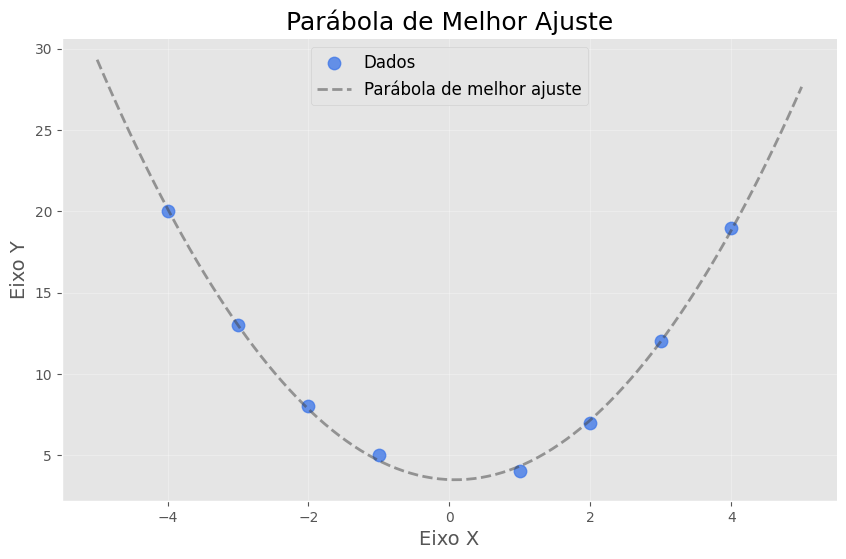

In [118]:
# Define o estilo ggplot2
plt.style.use('ggplot')

# Cria a figura e os eixos
fig, ax = plt.subplots(figsize=(10,6))

# Criando pontos para plotar a parábola
x_plot = np.linspace(-5, 5, 100)
y_plot = w1*x_plot**2 + w2*x_plot + b # 

# Plota os pontos de treinamento e a parábola
ax.scatter(X, Y, color='#437ae8', label='Dados', linewidth=1, alpha=0.8, s=80,)
ax.plot(x_plot, y_plot, '--', color='#404040', label='Parábola de melhor ajuste', linewidth=2, alpha=0.5)

# Define o título e os rótulos dos eixos
ax.set_title('Parábola de Melhor Ajuste', fontsize=18)
ax.set_xlabel('Eixo X', fontsize=14)
ax.set_ylabel('Eixo Y', fontsize=14)

# Adiciona a legenda
ax.legend(loc='upper center', fontsize=12)

# Adiciona a grade
ax.grid(True, alpha=0.3)

# Remove as bordas da figura
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Exibe o gráfico
plt.show()
